In [15]:
import numpy as np
import pandas as pd

In [16]:
# load data
country = pd.read_csv("https://raw.githubusercontent.com/radhika456/Prepinsta-Winter-Internship---Data-Analytics/master/Week%234/Metadata_Country.csv")
population = pd.read_csv("https://raw.githubusercontent.com/radhika456/Prepinsta-Winter-Internship---Data-Analytics/master/Week%234/country_population%20-%20country_population.csv")
fertility = pd.read_csv("https://raw.githubusercontent.com/radhika456/Prepinsta-Winter-Internship---Data-Analytics/master/Week%234/fertility_rate%20-%20fertility_rate.csv")
life_expectency = pd.read_csv("https://raw.githubusercontent.com/radhika456/Prepinsta-Winter-Internship---Data-Analytics/master/Week%234/life_expectancy%20-%20life_expectancy.csv")

Data Preprocessing
# Country table

In [17]:
country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [18]:
country = country[['Country Code','Region']]
country.head()


,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


In [19]:
country.isna().sum()

Country Code     0
Region          46
dtype: int64

# Population Table

In [20]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [21]:
population.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [22]:
population.drop(['Indicator Name','Indicator Code'],axis =1,inplace=True)
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [23]:
# Dropping null values
population.dropna(axis =0,inplace=True)

In [24]:
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [25]:
population.shape

(258, 59)

# Fertility Rate


In [26]:
fertility.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
fertility.shape

(264, 61)

In [28]:
fertility.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64

In [29]:
# Drop column
fertility.drop(['Indicator Name','Indicator Code'],axis =1,inplace=True)
fertility.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,7.478,7.524,7.563,7.592,7.611,7.619,7.618,7.613,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
fertility.shape

(264, 59)

In [31]:
# Dropping null values
fertility.dropna(axis =0,inplace=True)

In [32]:
fertility.shape

(235, 59)

In [33]:
fertility.isna().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013      

# Life Expentency

In [34]:
life_expectency.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
life_expectency.isna().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              29
                  ..
2012              17
2013              19
2014              19
2015              20
2016              19
Length: 61, dtype: int64

In [36]:
life_expectency.drop(['Indicator Name','Indicator Code'],axis =1,inplace=True)
life_expectency.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,32.292,32.742,33.185,33.624,34.060,34.495,34.928,35.361,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,33.251,33.573,33.914,34.272,34.645,35.031,35.426,35.828,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,62.279,63.298,64.187,64.911,65.461,65.848,66.108,66.302,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Dropping null values
life_expectency.dropna(axis =0,inplace=True)

In [38]:
life_expectency.shape

(235, 59)

In [39]:
life_expectency.isna().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013      

# Melting

In [40]:
years = [str(i) for i in range(1960,2017)]
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [41]:
# Melting of Population Table

df = pd.melt(population,
        id_vars=['Country Code', 'Country Name'],
        value_vars=years,
        var_name='Year',
        value_name='Population')



In [42]:
df.shape

(14706, 4)

In [43]:
df.head()

,Country Code,Country Name,Year,Population
0,ABW,Aruba,1960,54211.0
1,AFG,Afghanistan,1960,8996351.0
2,AGO,Angola,1960,5643182.0
3,ALB,Albania,1960,1608800.0
4,AND,Andorra,1960,13411.0


In [44]:
# Melting of Fertility rate Table

df1 = pd.melt(fertility,
        id_vars=['Country Code', 'Country Name'],
        value_vars=years,
        var_name='Year',
        value_name='Fertility_Rate')

In [45]:
df1.shape

(13395, 4)

In [46]:
df1.head()

,Country Code,Country Name,Year,Fertility_Rate
0,ABW,Aruba,1960,4.820000
1,AFG,Afghanistan,1960,7.450000
2,AGO,Angola,1960,7.478000
3,ALB,Albania,1960,6.489000
4,ARB,Arab World,1960,6.948747


In [47]:
# Melting of Life_expectency table

df2 = pd.melt(life_expectency,
        id_vars=['Country Code', 'Country Name'],
        value_vars=years,
        var_name='Year',
        value_name='Life_Expectency')

In [48]:
df2.shape

(13395, 4)

In [49]:
df2.head()

,Country Code,Country Name,Year,Life_Expectency
0,ABW,Aruba,1960,65.662000
1,AFG,Afghanistan,1960,32.292000
2,AGO,Angola,1960,33.251000
3,ALB,Albania,1960,62.279000
4,ARB,Arab World,1960,46.825065


# Merging of Tables

In [50]:
# Merging of country table with population table
contry_and_population_merge = pd.merge(country,df,how='left',on='Country Code')

In [51]:
contry_and_population_merge.shape

(14711, 5)

In [52]:
contry_and_population_merge.head()

,Country Code,Region,Country Name,Year,Population
0,ABW,Latin America & Caribbean,Aruba,1960,54211.0
1,ABW,Latin America & Caribbean,Aruba,1961,55438.0
2,ABW,Latin America & Caribbean,Aruba,1962,56225.0
3,ABW,Latin America & Caribbean,Aruba,1963,56695.0
4,ABW,Latin America & Caribbean,Aruba,1964,57032.0


In [53]:
contry_and_population_merge.isna().sum()

Country Code       0
Region          2622
Country Name       5
Year               5
Population         5
dtype: int64

In [54]:
fertility_merged =pd.merge(contry_and_population_merge,df1,how='left',on=['Country Code','Year','Country Name'])

In [55]:
fertility_merged.shape

(14711, 6)

In [56]:
fertility_merged.head()

,Country Code,Region,Country Name,Year,Population,Fertility_Rate
0,ABW,Latin America & Caribbean,Aruba,1960,54211.0,4.820
1,ABW,Latin America & Caribbean,Aruba,1961,55438.0,4.655
2,ABW,Latin America & Caribbean,Aruba,1962,56225.0,4.471
3,ABW,Latin America & Caribbean,Aruba,1963,56695.0,4.271
4,ABW,Latin America & Caribbean,Aruba,1964,57032.0,4.059


In [57]:
merged =pd.merge(fertility_merged,df2,how='left',on=['Country Code','Year','Country Name'])

In [58]:
merged.shape

(14711, 7)

In [59]:
merged.tail()

,Country Code,Region,Country Name,Year,Population,Fertility_Rate,Life_Expectency
14706,ZWE,Sub-Saharan Africa,Zimbabwe,2012,14710826.0,3.996,56.516
14707,ZWE,Sub-Saharan Africa,Zimbabwe,2013,15054506.0,3.957,58.053
14708,ZWE,Sub-Saharan Africa,Zimbabwe,2014,15411675.0,3.903,59.360
14709,ZWE,Sub-Saharan Africa,Zimbabwe,2015,15777451.0,3.836,60.398
14710,ZWE,Sub-Saharan Africa,Zimbabwe,2016,16150362.0,3.760,61.163


In [60]:
merged.isna().sum()

Country Code          0
Region             2622
Country Name          5
Year                  5
Population            5
Fertility_Rate     1430
Life_Expectency    1430
dtype: int64

In [61]:
merged.dropna(axis =0,inplace=True)

In [62]:
merged.isna().sum()

Country Code       0
Region             0
Country Name       0
Year               0
Population         0
Fertility_Rate     0
Life_Expectency    0
dtype: int64

In [63]:
merged.shape

(10602, 7)

# Plots

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Region vs Population using bar graph
import plotly.express as px

fig = px.bar(merged, x='Region', y='Population',
             hover_data=['Fertility_Rate','Life_Expectency'],
             animation_frame='Year',
             animation_group='Country Name',
             color='Region',
             range_y=[0,2500000000],template='plotly_dark')
fig.update_layout(title='Region vs Population')
fig.show()

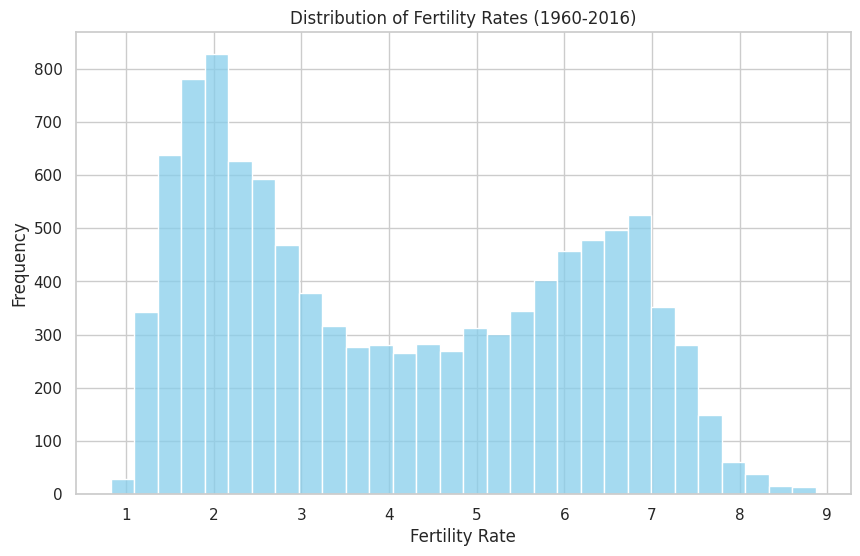

In [67]:
# Create a distribution plot using Seaborn
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the distribution of fertility rates
sns.histplot(data=merged, x='Fertility_Rate', kde=False, bins=30, color='skyblue')

# Set plot labels and title
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Fertility Rates (1960-2016)')

# Show the plot
plt.show()

In [68]:
import plotly.express as px
fig = px.scatter(data_frame = merged,
                                    x='Fertility_Rate',
                                    y='Life_Expectency',
                                    size='Population',
                                    size_max=100,
                                    hover_name='Region',
                                    color='Region',
                                    animation_frame='Year',
                                    animation_group='Population',
                                    template='plotly_dark',
                                    range_x=[0,10],
                                    range_y=[10,90])
fig.update_layout(title='Fertility Rate vs Life Expectancy', xaxis_title='Fertility Rate', yaxis_title='Life Expectancy')
fig.show()

In [69]:
import plotly.express as px

df = merged.query("Region =='South Asia'")
fig = px.bar(df, x='Year', y='Population',
             hover_data=['Fertility_Rate','Life_Expectency'], color='Country Name',
             labels={"Population of South Asia Region"}, height=400,template='plotly_dark',)
fig.update_layout(title='Population of South Asia Region')
fig.show()

In [70]:
import plotly.graph_objects as go

import pandas as pd



# Create figure
fig = go.Figure()

fig.add_trace(
    go.Bar(x=list(merged.Year), y=(merged.Population), hoverinfo='x+y'))

# Set title
fig.update_layout(
    title_text="Time series of Population over the Years with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()